In [81]:
import win32com.client
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#obj_cp_trade = win32com.client.Dispatch('CpTrade.CpTdUtil')
#obj_rq = win32com.client.Dispatch('CpSysDib.MarketEye')
obj_code_mgr = win32com.client.Dispatch('CpUtil.CpCodeMgr')
obj_stock_chart = win32com.client.Dispatch('CpSysDib.StockChart')

In [3]:
# 종목코드 가져오기
code_list_kospi = obj_code_mgr.GetStockListByMarket(1)
code_list_kosdaq = obj_code_mgr.GetStockListByMarket(2)
code_list_otc = obj_code_mgr.GetStockListByMarket(3)
code_list_konex = obj_code_mgr.GetStockListByMarket(5)

In [127]:
# 데이터 요청하기
# ['A005830', 'A000060', 'A001450', 'A000810']
code = 'A000810'
obj_stock_chart.SetInputValue(0, code)
obj_stock_chart.SetInputValue(1, ord('1')) # 1:기간으로 받기, 2:개수로 받기
obj_stock_chart.SetInputValue(2, '20190824')
obj_stock_chart.SetInputValue(3, '20060101')
obj_stock_chart.SetInputValue(5, [0, 2, 3, 4, 5, 8]) # 날짜, 시가, 고가, 저가, 종가, 거래량
obj_stock_chart.SetInputValue(6, ord('D')) # 차트 주기 - 일간
obj_stock_chart.SetInputValue(9, ord('1')) # 수정주가
obj_stock_chart.BlockRequest()

0

In [128]:
# 데이터 프레임 만들기
n = obj_stock_chart.GetHeaderValue(3)
data = list()
for i in range(n):
    date = obj_stock_chart.GetDataValue(0, i)
    open = obj_stock_chart.GetDataValue(1, i)
    high = obj_stock_chart.GetDataValue(2, i)
    low = obj_stock_chart.GetDataValue(3, i)
    close = obj_stock_chart.GetDataValue(4, i)
    vol = obj_stock_chart.GetDataValue(5, i)
    data.append([date, open, high, low, close, vol])
df = pd.DataFrame(data)
df.columns = ['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL']
df = df.sort_values(by='DATE').reset_index(drop=True)
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,2006-03-06,127500,128000,121500,125000,139148
1,2006-03-07,127000,127000,121500,126000,210335
2,2006-03-08,123000,126000,118500,126000,336477
3,2006-03-09,125000,126500,122500,125500,186295
4,2006-03-10,124000,126000,120500,122000,159483


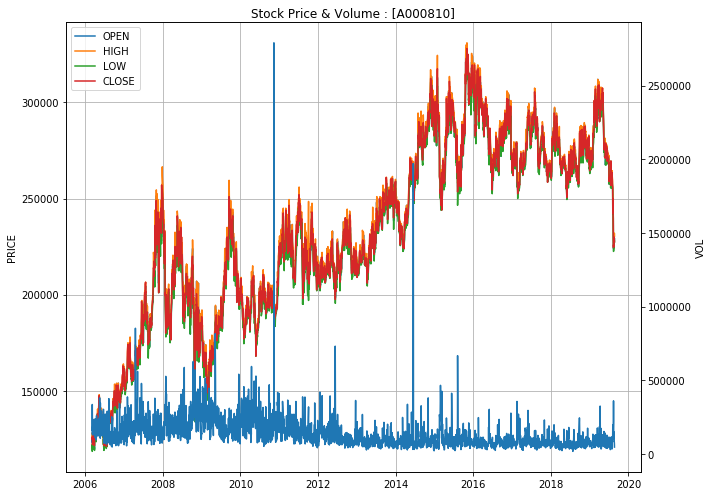

In [129]:
# 시각화
fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(df['DATE'], df['OPEN'], label='OPEN')
ax1.plot(df['DATE'], df['HIGH'], label='HIGH')
ax1.plot(df['DATE'], df['LOW'], label='LOW')

ax1.plot(df['DATE'], df['CLOSE'], label='CLOSE')
ax1.set_ylabel('PRICE')
ax1.grid()
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(df['DATE'], df['VOL'])
ax2.set_ylabel('VOL')
#ax2.set_ylim(0, 3e6)

plt.title('Stock Price & Volume : [{}]'.format(code))
fig.tight_layout()
plt.show()